# Initial Exploration

In [48]:
import pandas as pd
import numpy as np
from plotnine import *
import shapely.geometry
import shapely.wkt
from shapely import wkt
import geopandas as gpd
import folium
import matplotlib
import mapclassify

In [49]:
PATH_RAW = '../data/raw/'
PATH_INTERIM = '../data/interim/'

## Look at raw data

### Aggregate median jams kota bandung

In [50]:
df1 = pd.read_csv(PATH_RAW+"aggregate_median_jams_Kota Bandung_fixed.csv")
# df2 = pd.read_csv(PATH_RAW+"aggregate_median_jams_Kota Bandung_fixed.csv")

In [51]:
df1.sample(5)

,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,level,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
93378,75511,2022-07-24 19:00:00.000,32.73,KOTA BANDUNG,Dangdeur Indah 3,4,198.0,1144.0,0.530,2,34651729,2022-07-24,4.0,"LINESTRING (107.582346 -6.883335, 107.582368 -..."
9429,4286,2022-07-07 18:00:00.000,32.73,KOTA BANDUNG,Veteran,3,690.0,78.0,16.000,9,33540894,2022-07-07,3.0,"MULTILINESTRING ((107.613891 -6.918569, 107.61..."
79707,61840,2022-07-22 14:00:00.000,32.73,KOTA BANDUNG,Prof Dr Surya Sumantri,1,1064.0,72.0,22.270,3,34498736,2022-07-22,1.0,"MULTILINESTRING ((107.581136 -6.891975, 107.58..."
116983,99116,2022-07-29 15:00:00.000,32.73,KOTA BANDUNG,Astana Anyar,3,771.0,277.5,7.635,22,34948728,2022-07-29,3.0,"MULTILINESTRING ((107.598343 -6.920117, 107.59..."
163294,13416,2022-08-08 14:00:00.000,32.73,KOTA BANDUNG,Soekarno-Hatta (Jalur Lambat),3,1374.0,164.0,20.765,48,35608153,2022-08-08,3.0,"MULTILINESTRING ((107.646898 -6.943951, 107.64..."


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301995 entries, 0 to 301994
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 301995 non-null  int64  
 1   time                       301995 non-null  object 
 2   kemendagri_kabupaten_kode  301995 non-null  float64
 3   kemendagri_kabupaten_nama  301995 non-null  object 
 4   street                     299552 non-null  object 
 5   level                      301995 non-null  int64  
 6   median_length              301995 non-null  float64
 7   median_delay               301995 non-null  float64
 8   median_speed_kmh           301995 non-null  float64
 9   total_records              301995 non-null  int64  
 10  id                         301995 non-null  int64  
 11  date                       301995 non-null  object 
 12  median_level               301995 non-null  float64
 13  geometry                   30

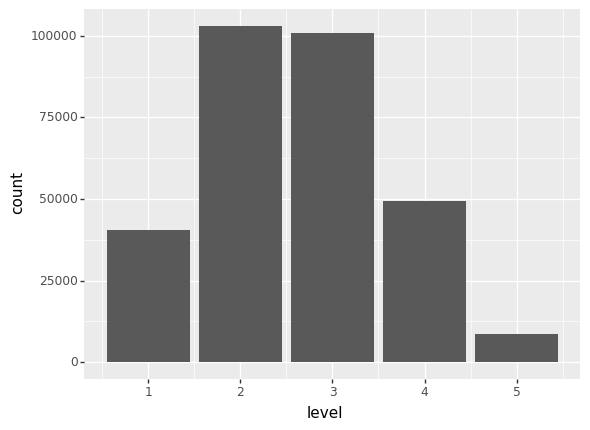

<ggplot: (185845441262)>

In [53]:
(
  ggplot(df1) +
  aes(x="level") +
  geom_bar()
)

In [54]:
df1.groupby('level').count().reset_index()

,level,Unnamed: 0,time,kemendagri_kabupaten_kode,kemendagri_kabupaten_nama,street,median_length,median_delay,median_speed_kmh,total_records,id,date,median_level,geometry
0,1,40444,40444,40444,40444,40404,40444,40444,40444,40444,40444,40444,40444,40444
1,2,102904,102904,102904,102904,102635,102904,102904,102904,102904,102904,102904,102904,102904
2,3,100783,100783,100783,100783,100418,100783,100783,100783,100783,100783,100783,100783,100783
3,4,49363,49363,49363,49363,49013,49363,49363,49363,49363,49363,49363,49363,49363
4,5,8501,8501,8501,8501,7082,8501,8501,8501,8501,8501,8501,8501,8501


In [55]:
df1.geometry.unique

<bound method Series.unique of 0         MULTILINESTRING ((107.622869 -6.919558, 107.62...
1         MULTILINESTRING ((107.59526 -6.947213, 107.595...
2         LINESTRING (107.652971 -6.940132, 107.653181 -...
3         LINESTRING (107.593922 -6.866493, 107.5939 -6....
4         MULTILINESTRING ((107.690448 -6.961397, 107.69...
                                ...                        
301990    MULTILINESTRING ((107.596827 -6.888612, 107.59...
301991    MULTILINESTRING ((107.596827 -6.888612, 107.59...
301992    MULTILINESTRING ((107.596747 -6.886963, 107.59...
301993    MULTILINESTRING ((107.588654 -6.945097, 107.58...
301994    MULTILINESTRING ((107.59526 -6.947213, 107.595...
Name: geometry, Length: 301995, dtype: object>

In [56]:
# df1[df1['street'].isna()].sample(3).iloc[0, len(df1.columns)-1]

In [57]:
df1['geometry'] = df1['geometry'].apply(wkt.loads)

In [58]:
gdf = gpd.GeoDataFrame(df1, crs='epsg:4326')

<AxesSubplot: >

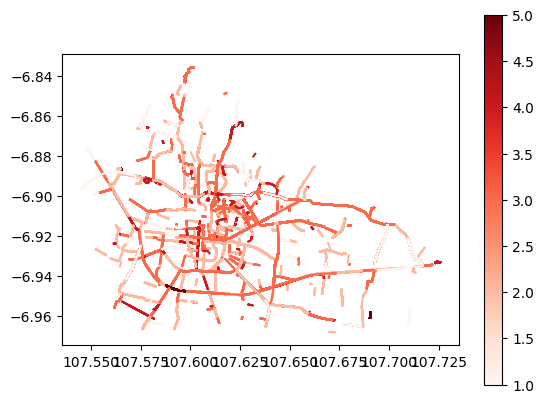

In [59]:
gdf.sample(1000).plot(column='level',cmap='Reds', legend=True)

In [60]:
# gdf.sample(1000).explore(column='level', cmap='Reds', style_kwds={'weight':8, 'opacity':0.8})

In [61]:
print('street unique data len:', len(df1.street.unique()))
print('street unique data example:', (df1.street.unique()))

street unique data len: 1162
street unique data example: ['Jenderal Ahmad Yani' 'Cibaduyut Raya' 'Cidurian Selatan' ... 'Yuda'
 'Leuwi Anyar' 'Kencana Puri 4']


In [62]:
# df1.time = pd.to_datetime(df1.time)

In [63]:
# df1.time

0        2022-07-06
1        2022-07-06
2        2022-07-06
3        2022-07-06
4        2022-07-06
            ...    
301990   2022-09-06
301991   2022-09-06
301992   2022-09-06
301993   2022-09-06
301994   2022-09-06
Name: time, Length: 301995, dtype: datetime64[ns]